In [5]:
import os

In [6]:
base_dir = 'C:\Masters\Sem02_Winter2022\DeepLearning\DeepLearning\AnimalImageDataset\Animal Image Dataset'
for i in os.listdir(base_dir):
    print(i,len(os.listdir(os.path.join(base_dir,i))))

butterfly 1452
cats 1456
cow 1451
dogs 1456
elephant 1450
hen 1452
horse 1452
monkey 1452
panda 1201
sheep 1452
spider 1452
squirrel 1452


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [145]:

train_datagen=ImageDataGenerator(rescale = 1.0/255., 
                               horizontal_flip=True,
                                vertical_flip=True,
                                rotation_range=90,
                                height_shift_range=0.1,
                                width_shift_range=0.1,
                                zoom_range=0.1,
                                validation_split=0.2)
# test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(base_dir,batch_size=64,class_mode='categorical',target_size=(150, 150),subset='training')
validation_generator = train_datagen.flow_from_directory(base_dir,batch_size=64,class_mode='categorical',target_size=(150, 150),subset='validation')


Found 13746 images belonging to 12 classes.
Found 3432 images belonging to 12 classes.


In [142]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 17, 17, 64)     

In [147]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])

In [ ]:

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    verbose=2)

Epoch 1/50
215/215 - 1110s - loss: 1.1283 - acc: 0.6065 - val_loss: 1.3638 - val_acc: 0.5478 - 1110s/epoch - 5s/step
Epoch 2/50
215/215 - 1120s - loss: 1.0841 - acc: 0.6239 - val_loss: 1.3744 - val_acc: 0.5536 - 1120s/epoch - 5s/step
Epoch 3/50
215/215 - 955s - loss: 1.0741 - acc: 0.6299 - val_loss: 1.3388 - val_acc: 0.5650 - 955s/epoch - 4s/step
Epoch 4/50


In [69]:
model.save('C:\Masters\Sem02_Winter2022\DeepLearning\DeepLearning\AnimalImageDataset\AnimalModel.h5')


In [37]:
modelSaved=tf.keras.models.load_model('C:\Masters\Sem02_Winter2022\DeepLearning\DeepLearning\AnimalModel.h5')
modelSaved.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 74, 74, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 17, 17, 32)     

In [55]:
from keras.preprocessing import image
import numpy as np
img=image.load_img('C:/Masters/Sem02_Winter2022/DeepLearning/DeepLearning/AnimalImageDataset/test.jpg',target_size=(150,150))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
classes = modelSaved.predict(images)
print(classes)
classIndex=np.where(classes==np.max(classes))[1][0]
pClass=os.listdir(base_dir)[classIndex]
print(np.argmax(classes),classIndex)
pClass

[[1.68823310e-12 2.96006726e-11 1.93933127e-15 9.94523048e-01
  5.30781572e-20 2.48943146e-13 6.95375535e-09 1.39474275e-03
  1.24406522e-16 1.30582114e-14 2.65639217e-04 3.81654873e-03]]
3 3


'dogs'

In [29]:
train_generator.class_indices

{'butterfly': 0,
 'cats': 1,
 'cow': 2,
 'dogs': 3,
 'elephant': 4,
 'hen': 5,
 'horse': 6,
 'monkey': 7,
 'panda': 8,
 'sheep': 9,
 'spider': 10,
 'squirrel': 11}

In [56]:
newModel=tf.keras.models.Sequential()
for i in modelSaved.layers[:-3]:
 
    newModel.add(i)
newModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 74, 74, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 17, 17, 32)      

In [57]:
featureList=[]
namesList=[]
count=0
for i in os.listdir(os.path.join(base_dir,pClass)):
    imgPath=os.path.join(os.path.join(base_dir,pClass),i)
    img=image.load_img(imgPath,target_size=(150,150))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    feature = newModel.predict(x, batch_size=10)
    featureList.append(feature)
    namesList.append(imgPath)
    count+=1
count    

1456

In [58]:
from keras.preprocessing import image
img=image.load_img('C:/Masters/Sem02_Winter2022/DeepLearning/DeepLearning/AnimalImageDataset/test.jpg',target_size=(150,150))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
inputFeature=newModel.predict(x,batch_size=10)
inputFeature

array([[3.0088055e+01, 0.0000000e+00, 1.0921204e+01, 0.0000000e+00,
        3.3910610e+01, 1.1373730e+01, 1.0615770e+00, 0.0000000e+00,
        2.6605162e+01, 2.7397038e+01, 1.2440969e+00, 4.6236277e-01,
        1.8929646e+01, 0.0000000e+00, 1.5775904e+01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.5332000e+00, 0.0000000e+00, 4.0704436e+00, 1.8766588e+01,
        4.7589582e-01, 1.5839007e+01, 0.0000000e+00, 3.0031674e+00,
        1.2231685e+01, 0.0000000e+00, 2.4289908e+00, 1.1364193e+01,
        0.0000000e+00, 0.0000000e+00, 4.2499914e+00, 5.6683472e+01,
        1.7768950e+01, 1.1062790e+01, 1.2686531e+01, 0.0000000e+00,
        6.3840145e+01, 0.0000000e+00, 1.7840773e+01, 8.0759001e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.0528212e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.1687235e+01, 0.0000000e+00,
        0.0000000e+00, 4.5720887e+00, 7.7080214e

In [59]:
from scipy.spatial import distance
distanceList=[]

for i in featureList:
    distanceList.append(distance.euclidean(inputFeature,i))
    
minDist=min(distanceList)
#print(distanceList)
minIndex=distanceList.index(minDist)
minDist,minIndex

(75.14877319335938, 315)

In [60]:
imgMatch=namesList[minIndex]
imgMatch

'C:\\Masters\\Sem02_Winter2022\\DeepLearning\\DeepLearning\\AnimalImageDataset\\Animal Image Dataset\\dogs\\dogs_00316.jpg'

In [17]:
import matplotlib.pyplot as plt
acc = history.history[ 'acc' ]
val_acc = history.history[ 'val_acc' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs


ax=plt.figure(figsize=(15,7))
ax1=ax.add_subplot(1,2,1)
plt.title ('Training and validation accuracy')


ax1.plot ( epochs, acc,label='Training Accuracy' )
ax1.plot ( epochs, val_acc ,label='Validation Accuracy')
ax1.legend()

ax2=ax.add_subplot(1,2,2)
ax2.plot ( epochs, loss,label='Training Loss')
ax2.plot ( epochs, val_loss ,label='Validation Loss')
plt.title ('Training and validation loss' )
ax2.legend()

plt.show()


NameError: name 'history' is not defined

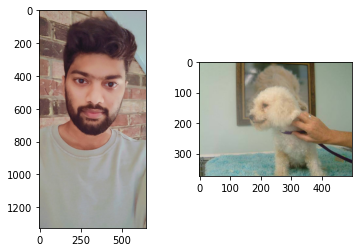

In [61]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image=mpimg.imread('C:/Masters/Sem02_Winter2022/DeepLearning/DeepLearning/AnimalImageDataset/test.jpg')
plt.subplot(1,2,1)
plt.imshow(image)
image2=mpimg.imread(imgMatch)
plt.subplot(1,2,2)

plt.imshow(image2)

In [20]:
model_reduced = tf.keras.Sequential()

for layer in modelSaved.layers[:-3]:
    model_reduced.add(layer)

In [21]:
model_reduced.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 74, 74, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 17, 17, 32)      

In [152]:
import pandas as pd
import numpy as np
import os,cv2
tensorPath='C:/Masters/Sem02_Winter2022/DeepLearning/DeepLearning/AnimalImageDataset/tensorboard'
dataDir=os.listdir(tensorPath)
classLabels={'butterfly': 0,'cats': 1,'cow': 2,'dogs': 3,'elephant': 4,'hen': 5,'horse': 6,'monkey': 7,'panda': 8,'sheep': 9,'spider': 10,'squirrel': 11}
df=pd.DataFrame(columns=['imageNames','labels','classNames'])
for data in dataDir:
    
    imglist=os.listdir(os.path.join(tensorPath,data))
    
    label=classLabels[data]
    for img in imglist:
        imageName=os.path.join(tensorPath,data,img)
        df=df.append({'imageNames':imageName,'labels':label,'classNames':data},ignore_index=True)
df.to_csv(os.path.join('C:/Masters/Sem02_Winter2022/DeepLearning/DeepLearning/AnimalImageDataset','tensor.csv'))      

In [153]:
import cv2
import os, argparse
import pickle
from keras.preprocessing import image
import numpy as np
from numpy import asarray
from keras.preprocessing.image import img_to_array

data_path = 'C:/Masters/Sem02_Winter2022/DeepLearning/DeepLearning/AnimalImageDataset/tensorboard'
data_dir_list = os.listdir(data_path)
image_features_list=[]
image_name_feature =[]
def get_image_features(image_file_name):
    im=image.load_img(image_file_name,target_size=(150,150))
    im=image.img_to_array(im)
    im=np.expand_dims(im,axis=0)
    image_feature=model_reduced.predict(im)
    return image_feature

In [154]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorboard.plugins import projector
import pandas as pd

LOG_DIR='C:\\Masters\\Sem02_Winter2022\\DeepLearning\\DeepLearning\\AnimalImageDataset\\embdeddingLogs'
if not os.path.exists(LOG_DIR):
    os.makedirs(LOG_DIR)
    
dataCSV=pd.read_csv('C:\\Masters\\Sem02_Winter2022\\DeepLearning\\DeepLearning\\AnimalImageDataset\\tensor.csv',
                   usecols=['imageNames','labels','classNames']) 
metadata_file=open(os.path.join(LOG_DIR,'metadata_12classes.tsv'),'w')
metadata_file.write('class\tName\n')
for label,name in zip(dataCSV.labels,dataCSV.classNames):
    metadata_file.write('{}\t{}\n'.format(label,name))
metadata_file.close()    

In [155]:
for img in (dataCSV.imageNames):
    image_features=get_image_features(img)
    image_features_list.append(image_features)
    
image_features_arr=np.asarray(image_features_list)
image_features_arr = np.rollaxis(image_features_arr,1,0)
image_features_arr=image_features_arr[0,:,:]    

In [156]:
# np.savetxt('C:\\Masters\\Sem02_Winter2022\\DeepLearning\\DeepLearning\\AnimalImageDataset\\feature_vectors_class_samples2.txt',image_features_arr)

pickle.dump(image_features_arr, open("C:\\Masters\\Sem02_Winter2022\\DeepLearning\\DeepLearning\\AnimalImageDataset\\feature_vectors_class_samples.pkl", 'wb'))
print('Done')

Done


In [157]:
#creating sprite images
imgData=[]
for img in (dataCSV.imageNames):
    inputImg=cv2.imread(img)
    inputImageResize=cv2.resize(inputImg,(150,150))
    imgData.append(inputImageResize)
imgData=np.array(imgData)

In [158]:
def imageToSprite(data):
    if(len(data.shape)==3):
        data = np.tile(data[...,np.newaxis], (1,1,1,3))
    data = data.astype(np.float32)
    min = np.min(data.reshape((data.shape[0], -1)), axis=1)
    data=(data.transpose(1,2,3,0)-min).transpose(3,0,1,2)
    max=np.max(data.reshape((data.shape[0],-1)),axis=1)
    data=(data.transpose(1,2,3,0)/max).transpose(3,0,1,2)
    
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, 0),
            (0, 0)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant',
            constant_values=0)
    # Tile the individual thumbnails into an image.
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3)
            + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    data = (data * 255).astype(np.uint8)
    
    return data     

In [159]:
sprite=imageToSprite(imgData)
cv2.imwrite(os.path.join(LOG_DIR, 'sprite_12classes.png'), sprite)

True

In [160]:
with open('C:/Masters/Sem02_Winter2022/DeepLearning/DeepLearning/AnimalImageDataset/feature_vectors_class_samples.pkl', 'rb') as f:
    feature_vectors = pickle.load(f)
print ("feature_vectors_shape:",feature_vectors.shape)
print ("num of images:",feature_vectors.shape[0])
print ("size of individual feature vector:",feature_vectors.shape[1])

#%%
features = tf.Variable(feature_vectors, name='features')
# Create a checkpoint from embedding, the filename and key are
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=features)
checkpoint.save(os.path.join(LOG_DIR, "embedding.ckpt"))

# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
    # Link this tensor to its metadata file (e.g. labels).
embedding.metadata_path =  'C:/Masters/Sem02_Winter2022/DeepLearning/DeepLearning/AnimalImageDataset/embdeddingLogs/metadata_12classes.tsv'
    # Comment out if you don't want sprites
embedding.sprite.image_path =  'C:/Masters/Sem02_Winter2022/DeepLearning/DeepLearning/AnimalImageDataset/embdeddingLogs/sprite_12classes.png'
embedding.sprite.single_image_dim.extend([imgData.shape[1], imgData.shape[1]])
    # Saves a config file that TensorBoard will read during startup.

projector.visualize_embeddings(LOG_DIR, config)

feature_vectors_shape: (1200, 512)
num of images: 1200
size of individual feature vector: 512


In [2]:
%reload_ext tensorboard
#del /q %TMP%\.tensorboard-info\*
%tensorboard --logdir='C:/Masters/Sem02_Winter2022/DeepLearning/DeepLearning/AnimalImageDataset/embdeddingLogs' --port=6009

Reusing TensorBoard on port 6009 (pid 25980), started 0:00:07 ago. (Use '!kill 25980' to kill it.)